<a href="https://colab.research.google.com/github/Ailianlian/liankanstudio/blob/master/liankan_py_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LianKanStudio Installation from Github.
you can comment %%capture to see the cell output

In [1]:
%%capture
!git clone https://github.com/Ailianlian/liankanstudio.git;

In [2]:
%%capture
%cd liankanstudio

In [3]:
%%capture
!pip install -r requirments.txt

In [4]:
# If you need restart after previous cell then execute, if not let the comment 
# %%capture
# %cd liankanstudio

In [5]:
%%capture
!python setup.py bdist_wheel

In [6]:
%%capture
!pip install dist/liankanstudio-0.4.3.5-py3-none-any.whl

In [7]:
# check you have torch cuda support. Enable it if you want (but there is really no reason to not do it.)
import torch
torch.cuda.is_available()

True

In [8]:
import liankanstudio as lks

In [9]:
from liankanstudio.util.yt_util import download, parse_url

In [10]:
# Takes a video, here is MISS DIOR – The new Eau de Parfum. Why not.
video_path, _ = download(parse_url("https://www.youtube.com/watch?v=h4s0llOpKrU"),'./temp_dl',"dior")

The directory is not present. Creating a new one..


In [20]:
# We can open a Capture.
capture = lks.Capture(video_path)

In [21]:
# Compute the scenes via a threshold method. This is used to know when we have to detect.
capture.find_scenes()

100%|██████████| 1125/1125 [00:02<00:00, 551.96frames/s]


In [22]:
# Here we create a detector with keypoint rcnn with resnet 50 as backbone, the one from torchvision models.
# detector = lks.Detector(method="torchkrcnn", target="person")
# The target can be any classes of lks.detector.COCO_INSTANCE_CATEGORY_NAMES
# you can use method="ssd"
# With the method="yolo" you can download the weights and cfg from https://pjreddie.com/darknet/yolo/ , the default is tiny.
# detector = lks.Detector(method="yolo", target="person", proto_path="truc.cfg", weights="truc.weights", size=500, classes=PERSONNAL_CLASSES_LIST)
# detector = lks.Detector(method="yolo", target="person")
# For the method ssd we use a ssd with mobilenet backbone. You can also change the location of weights with caffemodel.
# To go fast
detector = lks.Detector(method="torchmrcnn", target="person", downfact=2)

In [24]:
#cache = capture.compute_stat(detector, 10, video_path="./temp_dl/ssd_rt10.avi",threshold_detect=0.25,cache=True) # buggy
capture.detect_and_track(detector, 5, interactive=False, fps=-1,threshold_detect=0.5, output_path="./temp_dl/mrcnn_r5_t5.avi")

  0%|          | 0/1126 [00:00<?, ? frames /s]

Compute frame number to be analysed by detector.
./temp_dl/mrcnn_r5_t5.avi


100%|█████████▉| 1125/1126 [03:56<00:00,  4.77 frames /s]


In [16]:
# The purpose of cache is to help to do a warmup in the future.
# for example we can look cache[0]
# len(cache) =number of scene we have detected
# cache[0] is a dictionnary giving for each frame all the boxes detected, if there is a detection, the confidence, the labels and the tracking
# for example we can do the function
cache = capture.compute_stat(lks.Detector(method="torchmrcnn", target="person"), 100, threshold_detect=0.9,cache=True, video_path="./temp_dl/test.avi")
def get_alive_object_by_frame(scene_info):
  return [len(scene_info[frame_nb]["trackables"]) for frame_nb in scene_info]
def get_id_object_life(scene_info, obj_id):
  # return the presence or not of the object id
  return [obj_id in scene_info[frame_nb]["trackables"] for frame_nb in scene_info]


  1%|▏         | 16/1125 [00:00<00:06, 158.45 frames /s]

./temp_dl/test.avi


100%|██████████| 1125/1125 [00:06<00:00, 184.20 frames /s]


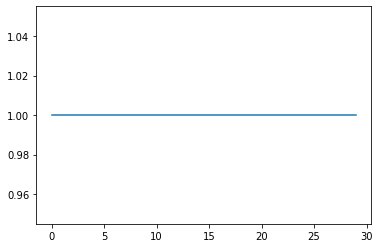

In [17]:
# in order to plot
import matplotlib.pyplot as plt
plt.plot(get_alive_object_by_frame(cache[0]));

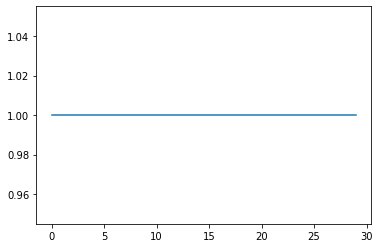

In [18]:
# We can also get the life of one tracked object
plt.plot(get_id_object_life(cache[0],0))

In [ ]:
# To go further we would need an identifier. But with this we already can try to detect the moment where we have few confidence in our number of boxes 
# and set a threshold by scene. This is what will come for 0.4.4.

In [ ]:
detector = lks.Detector(method="torchfrcnn", target="person")
cache = capture.compute_stat(detector, 15, video_path="./temp_dl/frcnn_rt10.avi",threshold_detect=0.8,cache=True)

  2%|▏         | 18/1125 [00:00<00:06, 177.52 frames /s]

./temp_dl/frcnn_rt10.avi


100%|██████████| 1125/1125 [00:05<00:00, 203.36 frames /s]


In [ ]:
# to reset the whole thing if a new version is available and notebook not updated.
#%%capture 
%cd ..
!rm -rf liankanstudio

/content
